In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
path1 = 'D:\\Term3Project\\Term3Project\\final.csv'
df = pd.read_csv(path1)
#x = dataset.iloc[:, [1, 2, 3, 4]].values

In [2]:
df.head()

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
Reached1=df['Reached.on.Time_Y.N']==1


In [4]:
Reach_1=df[Reached1]
Reach_2=df[Reached1]
Reach_1.head()

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
Reach_1.shape


(10207, 13)

In [6]:
Reach_1.head()

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
Reach_1['Gender']=Reach_1['Gender'].map({'F':0,'M':1})
Reach_1['Warehouse_block']=Reach_1['Warehouse_block'].map({'A':0,'B':1,'C':2,'D':3,'F':4})
Reach_1['Product_importance']=Reach_1['Product_importance'].map({'low':0,'medium':1,'high':2})
Reach_1['Mode_of_Shipment']=Reach_1['Mode_of_Shipment'].map({'Flight':0,'Ship':1,'Road':2})
Reach_1.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,1,3,0,4,2,177,3,0,0,44,1233,1
1,2,2,4,0,4,5,216,2,0,1,59,3088,1
2,3,3,0,0,2,2,183,4,0,1,48,3374,1
3,4,4,1,0,3,3,176,4,1,1,10,1177,1
4,5,5,2,0,2,2,184,3,1,0,46,2484,1


In [8]:


x = Reach_1.values
x

array([[    1,     1,     3, ...,    44,  1233,     1],
       [    2,     2,     4, ...,    59,  3088,     1],
       [    3,     3,     0, ...,    48,  3374,     1],
       ..., 
       [14990,  3991,     0, ...,    42,  6999,     1],
       [14991,  3992,     1, ...,     3,  1093,     1],
       [14992,  3993,     2, ...,    23,  1780,     1]], dtype=int64)

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

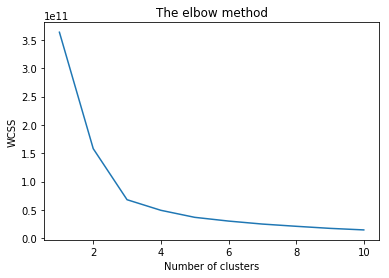

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [12]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster-3')

In [13]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

In [14]:
plt.legend()

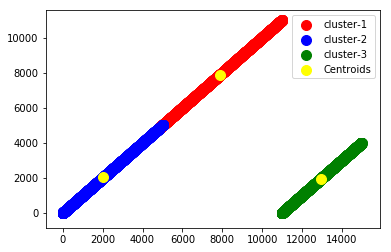

In [15]:
plt.show()

In [16]:
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

In [17]:
df1= pd.DataFrame(y_kmeans,columns=["cluster"],dtype=int)

In [18]:
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [19]:
df1.shape

(10207, 1)

In [20]:
Reach_1.shape

(10207, 13)

In [21]:
Reach_2.shape

(10207, 13)

In [22]:
Final_df=pd.concat([Reach_2,df1],axis=1)

In [23]:
Final_df.head(20)

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cluster
0,1.0,1.0,D,Flight,4.0,2.0,177.0,3.0,low,F,44.0,1233.0,1.0,1.0
1,2.0,2.0,F,Flight,4.0,5.0,216.0,2.0,low,M,59.0,3088.0,1.0,1.0
2,3.0,3.0,A,Flight,2.0,2.0,183.0,4.0,low,M,48.0,3374.0,1.0,1.0
3,4.0,4.0,B,Flight,3.0,3.0,176.0,4.0,medium,M,10.0,1177.0,1.0,1.0
4,5.0,5.0,C,Flight,2.0,2.0,184.0,3.0,medium,F,46.0,2484.0,1.0,1.0
5,6.0,6.0,F,Flight,3.0,1.0,162.0,3.0,medium,F,12.0,1417.0,1.0,1.0
6,7.0,7.0,D,Flight,3.0,4.0,250.0,3.0,low,F,3.0,2371.0,1.0,1.0
7,8.0,8.0,F,Flight,4.0,1.0,233.0,2.0,low,F,48.0,2804.0,1.0,1.0
8,9.0,9.0,A,Flight,3.0,4.0,150.0,3.0,low,F,11.0,1861.0,1.0,1.0
9,10.0,10.0,B,Flight,3.0,2.0,164.0,3.0,medium,F,29.0,1187.0,1.0,1.0
